In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from api_keys import g_key
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
file = 'thefile.csv'
df = pd.read_csv(file)
df = df.loc[(df['Climate Zone'] == 'Csb') | 
           (df['Climate Zone'] == 'Cfa') |
           (df['Climate Zone'] == 'Cfb') |
           (df['Climate Zone'] == 'Csa') |
           (df['Climate Zone'] == 'Dfb') |
           (df['Climate Zone'] == 'BSk') |
           (df['Climate Zone'] == 'Dfa') |
           (df['Climate Zone'] == 'BWk') |
           (df['Climate Zone'] == 'BSh') |
           (df['Climate Zone'] == 'Dfc') ]


cz=df['Climate Zone']
price = df.price
points = df.points


In [3]:
def anova(x,y):
    anova_df = pd.DataFrame({'cz':x,'p':y})
    group1 = anova_df[anova_df["cz"] == 'Csb']["p"]
    group2 = anova_df[anova_df["cz"] == 'Cfa']["p"]
    group3 = anova_df[anova_df["cz"] == 'Cfb']["p"]
    group4 = anova_df[anova_df["cz"] == 'Csa']["p"]
    group5 = anova_df[anova_df["cz"] == 'Dfb']["p"]
    group6 = anova_df[anova_df["cz"] == 'BSk']["p"]
    group7 = anova_df[anova_df["cz"] == 'Dfa']["p"]
    group8 = anova_df[anova_df["cz"] == 'BWk']["p"]
    group9 = anova_df[anova_df["cz"] == 'BSh']["p"]
    group10 = anova_df[anova_df["cz"] == 'Dfc']["p"]
    return stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10)

In [33]:
def anovaplot(x,y):
    anova_df = pd.DataFrame({'cz':x,'p':y})
    anova_df.boxplot('p', by='cz',figsize=(20,10))
    
    #plt.legend()
    plt.tight_layout()

In [34]:
anova(cz,price)


F_onewayResult(statistic=4.810849497540905, pvalue=1.9063368236739745e-06)

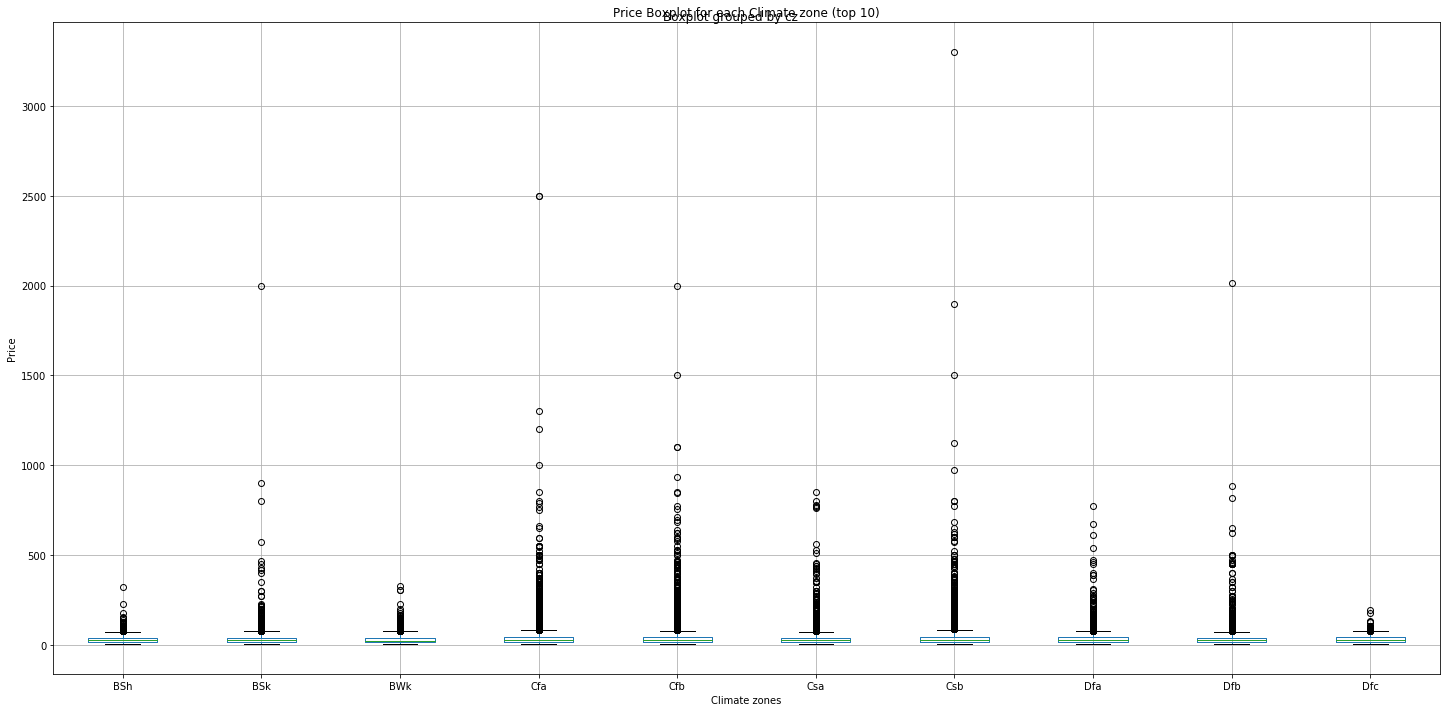

In [44]:
_=anovaplot(cz,price)
#plt.ylim(0,100)
_ =plt.ylabel('Price')
_=plt.xlabel('Climate zones')
_=plt.title('Price Boxplot for each Climate zone (top 10)')
plt.savefig('../pics/priceclimatelrg.png');

In [36]:
anova(cz,points)

F_onewayResult(statistic=14.349518606397297, pvalue=1.8375319996478052e-23)

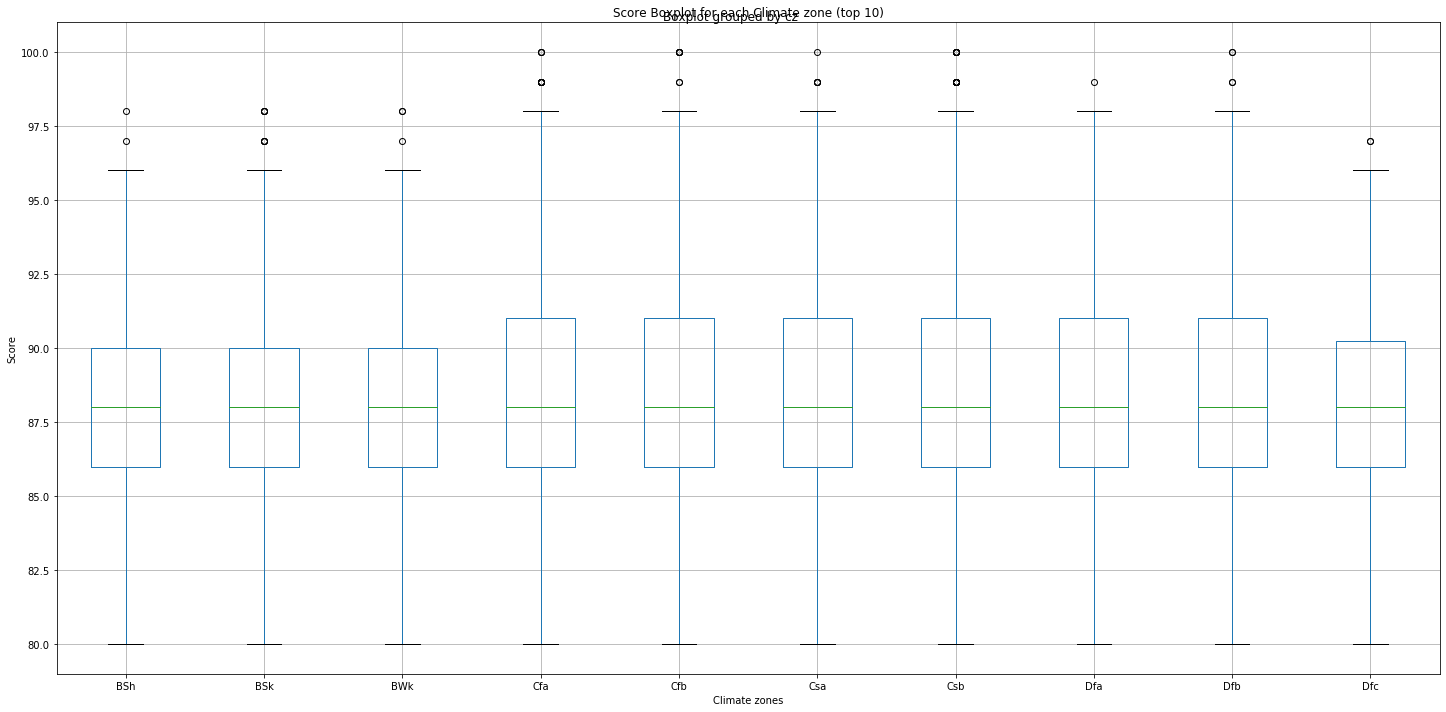

In [45]:
anovaplot(cz,points)
_ =plt.ylabel('Score')
_=plt.xlabel('Climate zones')
_=plt.title('Score Boxplot for each Climate zone (top 10)')
plt.savefig('../pics/scoreclimate.png');

In [49]:
df2 = pd.read_csv(file)


#df['Event'] = np.where((df.Event == 'Painting'),'Art',df.Event)


df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Cfa'),1,df2['Climate Zone'])
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Csb'),2,df2['Climate Zone'])
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Csa'),22,df2['Climate Zone'])
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Cfb'),3,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Dfb'),4,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Dfa'),5,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'BWk'),6,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'BSk'),7,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'BSh'),8,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'ET'),9,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Dfc'),10,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Af'),11,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Cwb'),12,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Aw'),13,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'BWh'),14,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Dsb'),15,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Am'),16,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Cwa'),17,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'As'),18,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Cwc'),19,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Cfc'),20,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Dsc'),21,df2['Climate Zone']) 
df2 = df2.loc[df2['Climate Zone']  != 'not avail']
df2
            

,Unnamed: 0,country,description,points,price,region_1,taster_name,title,variety,winery,Lat,Lng,heat weights,year,Climate Zone,Climate Zone Desc.,raiting
0,40684,Italy,"This gorgeous, fragrant wine opens with classi...",100,550.0,Brunello di Montalcino,Kerin O’Keefe,Biondi Santi 2010 Riserva (Brunello di Montal...,Sangiovese,Biondi Santi,43.044505,11.503158,20,2010.0,1,"Humid subtropical, no dry season",100
1,37379,Portugal,This is the latest release of what has long be...,100,450.0,not avail,Roger Voss,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red,Casa Ferreirinha,37.225606,-95.716202,20,2008.0,2,"Mediterranean, warm summer",100
2,101537,France,"Almost black in color, this stunning wine is g...",100,1500.0,Pauillac,Roger Voss,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend,Château Lafite Rothschild,45.224953,-0.772436,20,2010.0,2,"Mediterranean, warm summer",100
3,101540,France,"A hugely powerful wine, full of dark, brooding...",100,359.0,Saint-Julien,Roger Voss,Château Léoville Las Cases 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Las Cases,45.163850,-0.740166,20,2010.0,1,"Humid subtropical, no dry season",100
4,6760,Italy,Thick as molasses and dark as caramelized brow...,100,210.0,Vin Santo di Montepulciano,not avail,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi,43.173566,11.933298,20,1995.0,2,"Mediterranean, warm summer",100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113397,81281,Brazil,Candied-raspberry aromas are soapy and strange...,80,15.0,not avail,Michael Schachner,Casa Perini 2015 Macaw Soft Tannat (Serra Gaúcha),Tannat,Casa Perini,-29.255195,-51.291743,0,2015.0,2,"Mediterranean, warm summer",0
113398,14394,Argentina,"Yellowish in color, a true indicator that this...",80,13.0,Salta,Michael Schachner,Villa Viña 2006 Torrontés (Salta),Torrontés,Villa Viña,37.289512,-8.553532,0,2006.0,22,"Mediterranean, hot summer",0
113399,14395,Spain,"Best on the nose, but sharp and narrow as can ...",80,17.0,Cariñena,Michael Schachner,Reula 2003 Oak Aged Tempranillo-Merlot (Cariñena),Tempranillo-Merlot,Reula,41.650792,-0.879908,0,2003.0,7,Mid-latitude steppe,0
113400,14396,Argentina,Trapiche's Broquel line has never featured Pin...,80,17.0,Mendoza,Michael Schachner,Trapiche 2006 Broquel Pinot Noir (Mendoza),Pinot Noir,Trapiche,25.788579,-108.999041,0,2006.0,22,"Mediterranean, hot summer",0


In [50]:
lat = df2['Lat'].astype('int64')
points = df2['points'].astype('int64')




In [115]:
def lireg(x,y):
    (slope, intercept, r_value, p_value, std_err) = linregress(x, y)
    regress_value = x*slope+intercept
    line_eq = 'y = ' +str(round(slope,2)) + ' x + ' + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_value,'r-')
    plt.annotate(r_value,(x.min()+1,y.min()+1),c='black',size=15)
    print(f'The r-scared is: {r_value}')

The r-scared is: 0.10420218374709544


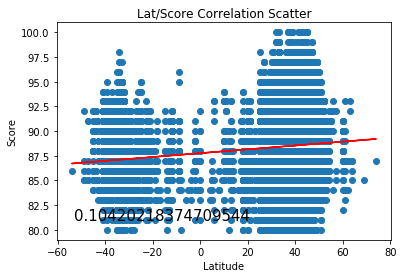

In [116]:
lireg(lat,points)
_ =plt.ylabel('Score')
_=plt.xlabel('Latitude')
_=plt.title('Lat/Score Correlation Scatter')

plt.savefig('../pics/latscore.png');


In [117]:
#lireg(lat,price)

The r-scared is: -0.09548008367130886


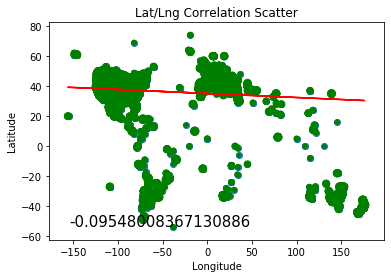

In [118]:
lng = df2['Lng'].astype('int64')
lireg(lng,lat)
plt.scatter(lng,lat,s=df2.raiting,c='green')
_ =plt.ylabel('Latitude')
_=plt.xlabel('Longitude')
_=plt.title('Lat/Lng Correlation Scatter')

plt.savefig('../pics/lnglat.png');

The r-scared is: 0.4139236204167073


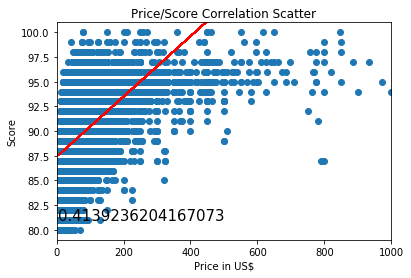

In [119]:
price = df2['price'].astype('int64')
lireg(price,points)
year = df2['year'].astype('int64')
_=plt.ylim(79,101)
plt.xlim(0,1000)
_ =plt.ylabel('Score')
_=plt.xlabel('Price in US$')
_=plt.title('Price/Score Correlation Scatter')

plt.savefig('../pics/pricescore.png');

The r-scared is: 0.06920249287389671


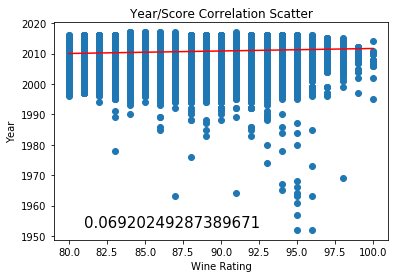

In [120]:
lireg(points,year)
#_=plt.ylim(79,101)
#plt.xlim(0,1000)
_ =plt.ylabel('Year')
_=plt.xlabel('Wine Rating')
_=plt.title('Year/Score Correlation Scatter')

plt.savefig('../pics/yearscore.png');

The r-scared is: -0.09245944216426968


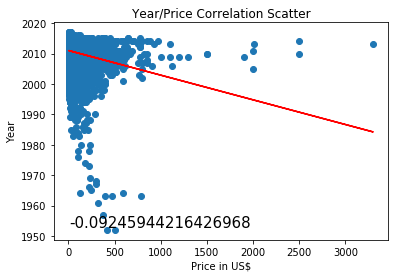

In [121]:
lireg(price,year)
#_=plt.ylim(79,101)
#plt.xlim(0,1000)
_ =plt.ylabel('Year')
_=plt.xlabel('Price in US$')
_=plt.title('Year/Price Correlation Scatter')

plt.savefig('../pics/yearprice.png');

The r-scared is: -0.01162055895660395


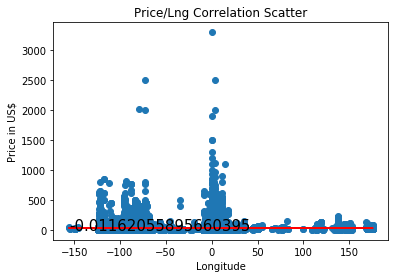

In [122]:
lireg(lng,price)
#_=plt.ylim(79,101)
#plt.xlim(0,1000)
_ =plt.ylabel('Price in US$')
_=plt.xlabel('Longitude')
_=plt.title('Price/Lng Correlation Scatter')

plt.savefig('../pics/pricelng.png');

The r-scared is: 0.011792353042180213


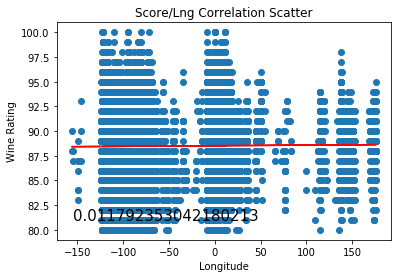

In [123]:
lireg(lng,points)
#_=plt.ylim(79,101)
#plt.xlim(0,1000)
_ =plt.ylabel('Wine Rating')
_=plt.xlabel('Longitude')
_=plt.title('Score/Lng Correlation Scatter')

plt.savefig('../pics/scorelng.png');